##Question 1 Use yfinance to Extract Stock Data

In [5]:
pip install yfinance


In [6]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download('TSLA')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data_head = tesla_data.head()
print(tesla_data_head)


[*********************100%%**********************]  1 of 1 completed

        Date      Open      High       Low     Close  Adj Close     Volume
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


## Question2 the last five rows of the tesla_revenue 

In [7]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.


In [14]:
import yfinance as yf
import pandas as pd

# Get Tesla's financial data
tesla = yf.Ticker("TSLA")

# Get the revenue data
financials = tesla.financials
revenue = financials.loc['Total Revenue']

# Create a dataframe
tesla_revenue = pd.DataFrame(revenue).reset_index()
tesla_revenue.columns = ['Date', 'Revenue']

# Display the last five rows
tesla_revenue_tail = tesla_revenue.tail()
print(tesla_revenue_tail)


        Date        Revenue
0 2023-12-31  96773000000.0
1 2022-12-31  81462000000.0
2 2021-12-31  53823000000.0
3 2020-12-31  31536000000.0


In [15]:
pip install selenium


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.5 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.5 MB 4.9 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.5 MB 7.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.5 MB 8.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.0/9.5 MB 9.0 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.5 MB 8.8 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.5 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.5 MB 7.6 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.5 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.5 MB 9.6 MB/s eta 0:00:01
   ----------------------- ------

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Set up the webdriver
driver = webdriver.Chrome()  # or another browser driver

# Go to the website
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
driver.get(url)

# Wait for the page to load completely
time.sleep(5)

# Locate the revenue table
tables = driver.find_elements(By.TAG_NAME, 'table')

# Inspect the tables and find the correct one (based on headers or other characteristics)
for i, table in enumerate(tables):
    if 'Tesla Quarterly Revenue' in table.text:
        revenue_table = table
        break

# Parse the table rows
rows = revenue_table.find_elements(By.TAG_NAME, 'tr')
data = []
for row in rows[1:]:  # Skipping the header row
    cols = row.find_elements(By.TAG_NAME, 'td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a dataframe
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Display the last five rows
tesla_revenue_tail = tesla_revenue.tail()
print(tesla_revenue_tail)

# Close the browser
driver.quit()


          Date Revenue
55  2010-06-30      28
56  2010-03-31      21
57  2009-12-31        
58  2009-09-30      46
59  2009-06-30      27


In [17]:
pip install yfinance


##Question 3

In [19]:
import yfinance as yf

# Download GameStop stock data
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data_head = gme_data.head()
print(gme_data_head)


[*********************100%%**********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


## Question 4: Use Webscraping to Extract GME Revenue Data

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# Set up the webdriver
driver = webdriver.Chrome()  # or specify the path to your chromedriver

# Go to the website
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
driver.get(url)

# Wait for the page to load completely
time.sleep(5)

# Locate the revenue table
revenue_table = driver.find_element(By.XPATH, "//table[contains(@class, 'historical_data_table')]")

# Extract the table rows
rows = revenue_table.find_elements(By.TAG_NAME, 'tr')

# Parse the table data
data = []
for row in rows[1:]:  # Skipping the header row
    cols = row.find_elements(By.TAG_NAME, 'td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    data.append([date, revenue])

# Create a dataframe
gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Display the last five rows
gme_revenue_tail = gme_revenue.tail()
print(gme_revenue_tail)

# Close the browser
driver.quit()


    Date Revenue
11  2013    8887
12  2012    9551
13  2011    9474
14  2010    9078
15  2009    8806


##Question 5: Plot Tesla Stock Graph

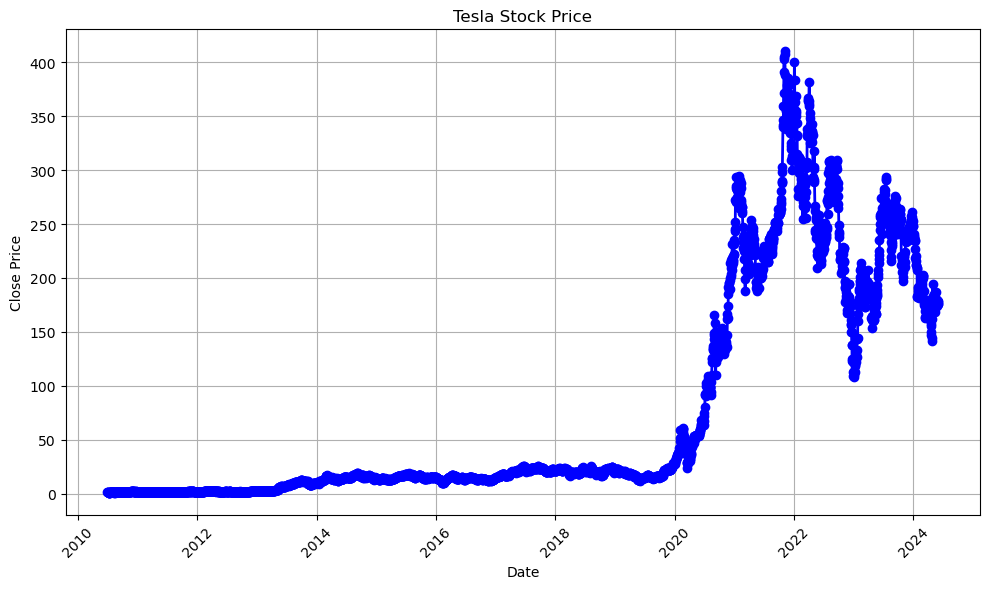

In [31]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], color='blue', marker='o', linestyle='-', linewidth=2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Assuming you have a DataFrame named tesla_data
title = "Tesla Stock Price"
make_graph(tesla_data, title)


## Question 6 Plot GameStop Stock Graph

In [32]:
# Download GameStop stock data
gme_data = yf.download('GME')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date     Open     High      Low    Close  Adj Close    Volume
0 2002-02-13  2.40625  2.51500  2.38125  2.51250   1.691667  76216000
1 2002-02-14  2.54375  2.54875  2.48125  2.50000   1.683250  11021600
2 2002-02-15  2.50000  2.50625  2.46250  2.48750   1.674834   8389600
3 2002-02-19  2.47500  2.47500  2.34375  2.38750   1.607504   7410400
4 2002-02-20  2.40000  2.46875  2.38125  2.46875   1.662210   6892800


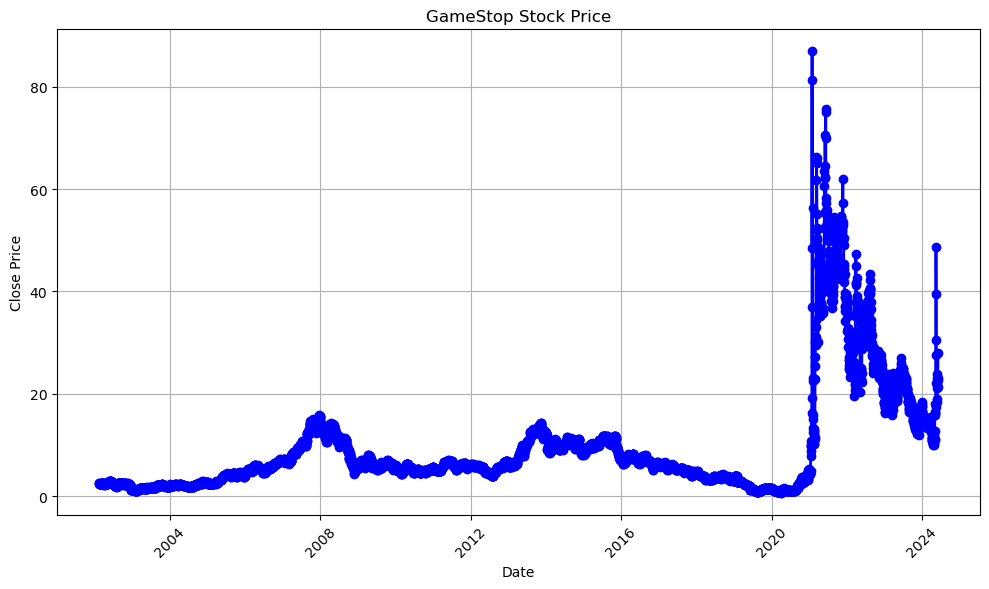

In [33]:
# Assuming you have a DataFrame named gme_data
title = "GameStop Stock Price"
make_graph(gme_data, title)
